# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# !pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'Output/weather_df.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | mattoon
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | albany
City not found. Skipping...
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | puerto carreno
Processing Record 13 of Set 1 | raudeberg
Processing Record 14 of Set 1 | codrington
City not found. Skipping...
Processing Record 15 of Set 1 | bajil
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | pedreiras
Processing Record 19 of Set 1 | predivinsk
Processing Record 20 of Set 1 | sitka
City not found. Skipping...
Processing Record 21 of Set 1 | zhezkazgan
Processing Record 22 of Set 1 | portland
Processing Record 2

Processing Record 38 of Set 4 | sinaloa
Processing Record 39 of Set 4 | puerto madero
Processing Record 40 of Set 4 | gornopravdinsk
Processing Record 41 of Set 4 | vanimo
Processing Record 42 of Set 4 | iglesias
Processing Record 43 of Set 4 | tevaitoa
Processing Record 44 of Set 4 | coahuayana
Processing Record 45 of Set 4 | kharan
City not found. Skipping...
Processing Record 46 of Set 4 | sao jose da coroa grande
Processing Record 47 of Set 4 | port-gentil
Processing Record 48 of Set 4 | rockland
Processing Record 49 of Set 4 | inongo
Processing Record 1 of Set 5 | port jervis
Processing Record 2 of Set 5 | nhulunbuy
Processing Record 3 of Set 5 | waipawa
Processing Record 4 of Set 5 | samarai
Processing Record 5 of Set 5 | andenes
Processing Record 6 of Set 5 | savannah bight
Processing Record 7 of Set 5 | chiredzi
Processing Record 8 of Set 5 | mathbaria
Processing Record 9 of Set 5 | bangangte
Processing Record 10 of Set 5 | sao filipe
Processing Record 11 of Set 5 | panubigan
P

Processing Record 28 of Set 8 | acarau
Processing Record 29 of Set 8 | kutum
Processing Record 30 of Set 8 | huarmey
Processing Record 31 of Set 8 | colombo
City not found. Skipping...
Processing Record 32 of Set 8 | grand baie
Processing Record 33 of Set 8 | cockburn town
Processing Record 34 of Set 8 | zakamensk
Processing Record 35 of Set 8 | noumea
Processing Record 36 of Set 8 | karera
Processing Record 37 of Set 8 | narsaq
Processing Record 38 of Set 8 | meulaboh
Processing Record 39 of Set 8 | talcahuano
Processing Record 40 of Set 8 | saint-augustin
Processing Record 41 of Set 8 | aleksandrov gay
Processing Record 42 of Set 8 | keuruu
Processing Record 43 of Set 8 | vostok
Processing Record 44 of Set 8 | urla
Processing Record 45 of Set 8 | polessk
Processing Record 46 of Set 8 | cherskiy
City not found. Skipping...
Processing Record 47 of Set 8 | sechura
Processing Record 48 of Set 8 | juybar
Processing Record 49 of Set 8 | virden
Processing Record 1 of Set 9 | ginda
Processin

Processing Record 19 of Set 12 | dera bugti
Processing Record 20 of Set 12 | cozumel
Processing Record 21 of Set 12 | touros
Processing Record 22 of Set 12 | shirokiy
Processing Record 23 of Set 12 | griffith
Processing Record 24 of Set 12 | mitu
Processing Record 25 of Set 12 | saint-pierre
Processing Record 26 of Set 12 | koumac
Processing Record 27 of Set 12 | porto novo
Processing Record 28 of Set 12 | camacha
Processing Record 29 of Set 12 | puerto baquerizo moreno
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [6]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [7]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hamilton,1,US,1590338694,69,39.18,-84.53,84.99,3.36
1,mattoon,1,US,1590338718,69,39.48,-88.37,84.00,5.82
2,yellowknife,20,CA,1590338718,59,62.46,-114.35,39.00,2.24
3,albany,100,US,1590338666,33,42.60,-73.97,70.00,9.19
4,hobart,90,AU,1590338718,75,-42.88,147.33,46.40,8.05


In [8]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [9]:
weather_dataframe.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

In [10]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hamilton,1,US,1590338694,69,39.18,-84.53,84.99,3.36
1,mattoon,1,US,1590338718,69,39.48,-88.37,84.00,5.82
2,yellowknife,20,CA,1590338718,59,62.46,-114.35,39.00,2.24
3,albany,100,US,1590338666,33,42.60,-73.97,70.00,9.19
4,hobart,90,AU,1590338718,75,-42.88,147.33,46.40,8.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.

cities_df=weather_dataframe.loc[weather_dataframe['Humidity']>100]
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [12]:
# there was no city with humidity > 100% as seen above and therefore, no result was turned in.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

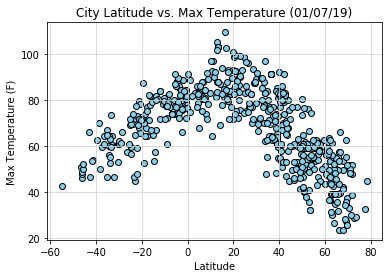

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Latitude vs. Humidity Plot

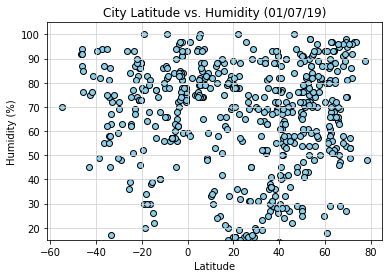

In [14]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Latitude vs. Cloudiness Plot

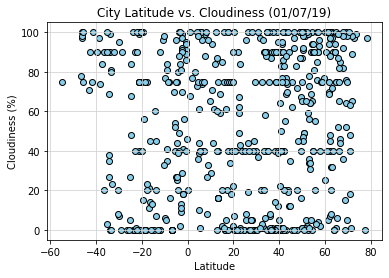

In [15]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Latitude vs. Wind Speed Plot

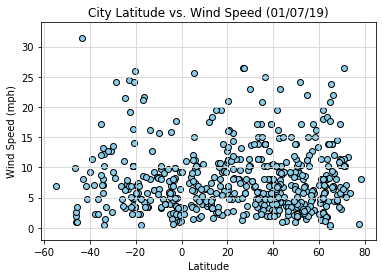

In [16]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots

In [18]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
lat_df = weather_dataframe.loc[weather_dataframe['Lat']>=0,"Lat"]
lat_df= lat_df.reset_index()
x_values = lat_df["Lat"]
print(x_values)

0      39.18
1      39.48
2      62.46
3      42.60
4      42.10
       ...  
401    41.53
402     1.20
403    41.15
404    33.08
405    36.59
Name: Lat, Length: 406, dtype: float64


In [20]:
max_temp_df = weather_dataframe.loc[weather_dataframe['Lat']>=0,'Max Temp']
max_temp_df
y_values = max_temp_df
print(y_values)

0      84.99
1      84.00
2      39.00
3      70.00
5      79.00
       ...  
561    82.99
562    74.88
565    80.01
566    77.00
567    91.40
Name: Max Temp, Length: 406, dtype: float64


The r-squared is: -0.8026860101172247


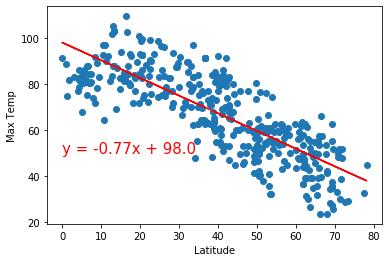

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
lat_df = weather_dataframe.loc[weather_dataframe['Lat']<=0,"Lat"]
lat_df= lat_df.reset_index()
x_values = lat_df["Lat"]
print(x_values)

0     -42.88
1      -2.57
2     -46.19
3     -21.20
4     -38.27
       ...  
157   -39.81
158    -3.83
159    -5.20
160   -21.34
161   -20.57
Name: Lat, Length: 162, dtype: float64


In [23]:
max_temp_df = weather_dataframe.loc[weather_dataframe['Lat']<=0,'Max Temp']
max_temp_df
y_values = max_temp_df
print(y_values)

4      46.40
6      81.81
8      46.08
9      68.00
13     50.14
       ...  
555    62.60
556    72.18
559    77.00
563    71.60
564    71.10
Name: Max Temp, Length: 162, dtype: float64


The r-squared is: 0.7878265078438116


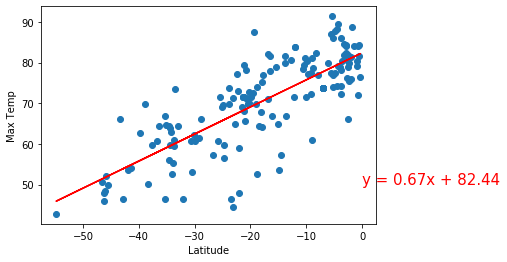

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [25]:
lat_df = weather_dataframe.loc[weather_dataframe['Lat']>=0,"Lat"]
lat_df= lat_df.reset_index()
x_values = lat_df["Lat"]
print(x_values)

0      39.18
1      39.48
2      62.46
3      42.60
4      42.10
       ...  
401    41.53
402     1.20
403    41.15
404    33.08
405    36.59
Name: Lat, Length: 406, dtype: float64


In [26]:
humidity_df = weather_dataframe.loc[weather_dataframe['Lat']>=0,'Humidity']
humidity_df
y_values = humidity_df
print(y_values)

0      69
1      69
2      59
3      33
5      64
       ..
561    69
562    97
565    50
566    33
567    37
Name: Humidity, Length: 406, dtype: int64


The r-squared is: 0.18035201334927192


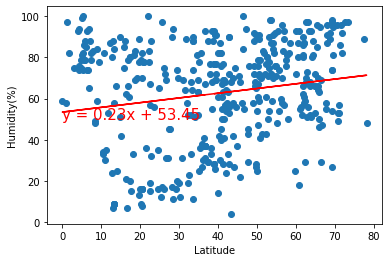

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [28]:
lat_df = weather_dataframe.loc[weather_dataframe['Lat']<=0,"Lat"]
lat_df= lat_df.reset_index()
x_values = lat_df["Lat"]
print(x_values)

0     -42.88
1      -2.57
2     -46.19
3     -21.20
4     -38.27
       ...  
157   -39.81
158    -3.83
159    -5.20
160   -21.34
161   -20.57
Name: Lat, Length: 162, dtype: float64


In [29]:
humidity_df = weather_dataframe.loc[weather_dataframe['Lat']<=0,'Humidity']
humidity_df
y_values = humidity_df
print(y_values)

4      75
6      78
8      94
9      88
13     82
       ..
555    93
556    83
559    94
563    73
564    73
Name: Humidity, Length: 162, dtype: int64


The r-squared is: 0.02324941065730002


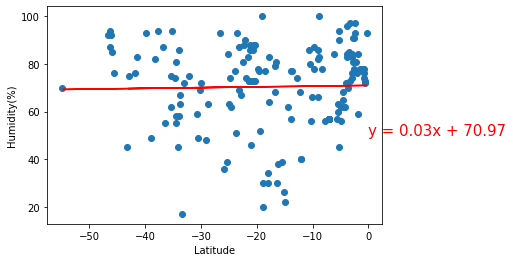

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [31]:
lat_df = weather_dataframe.loc[weather_dataframe['Lat']>=0,"Lat"]
lat_df= lat_df.reset_index()
x_values = lat_df["Lat"]
print(x_values)

0      39.18
1      39.48
2      62.46
3      42.60
4      42.10
       ...  
401    41.53
402     1.20
403    41.15
404    33.08
405    36.59
Name: Lat, Length: 406, dtype: float64


In [32]:
cloudiness_df = weather_dataframe.loc[weather_dataframe['Lat']>=0,'Cloudiness']
cloudiness_df
y_values = cloudiness_df
print(y_values)

0        1
1        1
2       20
3      100
5       40
      ... 
561      1
562    100
565     75
566     96
567      0
Name: Cloudiness, Length: 406, dtype: int64


The r-squared is: 0.1480222062465455


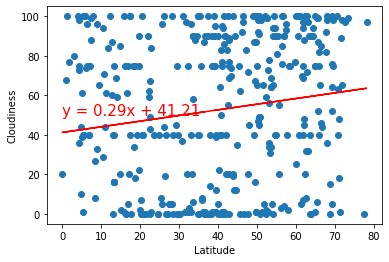

In [33]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [34]:
lat_df = weather_dataframe.loc[weather_dataframe['Lat']<=0,"Lat"]
lat_df= lat_df.reset_index()
x_values = lat_df["Lat"]
print(x_values)

0     -42.88
1      -2.57
2     -46.19
3     -21.20
4     -38.27
       ...  
157   -39.81
158    -3.83
159    -5.20
160   -21.34
161   -20.57
Name: Lat, Length: 162, dtype: float64


In [35]:
cloudiness_df = weather_dataframe.loc[weather_dataframe['Lat']<=0,'Cloudiness']
cloudiness_df
y_values = cloudiness_df
print(y_values)

4       90
6       92
8       97
9       40
13      74
      ... 
555     90
556     88
559     75
563     75
564    100
Name: Cloudiness, Length: 162, dtype: int64


The r-squared is: -0.17600675360002327


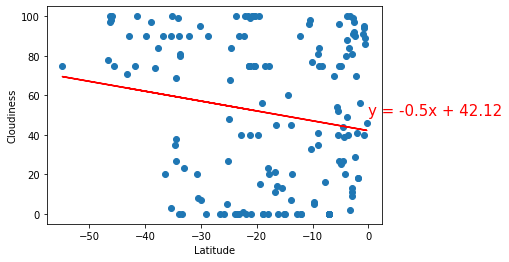

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [37]:
lat_df = weather_dataframe.loc[weather_dataframe['Lat']>=0,"Lat"]
lat_df= lat_df.reset_index()
x_values = lat_df["Lat"]
print(x_values)

0      39.18
1      39.48
2      62.46
3      42.60
4      42.10
       ...  
401    41.53
402     1.20
403    41.15
404    33.08
405    36.59
Name: Lat, Length: 406, dtype: float64


In [38]:
wind_speed_df = weather_dataframe.loc[weather_dataframe['Lat']>=0,'Wind Speed']
wind_speed_df
y_values = wind_speed_df
print(y_values)

0       3.36
1       5.82
2       2.24
3       9.19
5      16.11
       ...  
561     6.71
562     2.24
565    10.29
566    17.22
567    13.87
Name: Wind Speed, Length: 406, dtype: float64


The r-squared is: 0.0065861603801302526


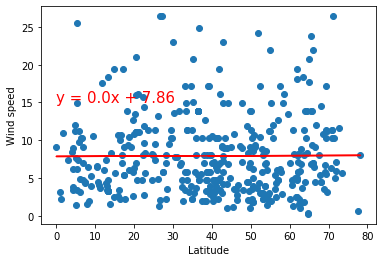

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [40]:
lat_df = weather_dataframe.loc[weather_dataframe['Lat']<=0,"Lat"]
lat_df= lat_df.reset_index()
x_values = lat_df["Lat"]
print(x_values)

0     -42.88
1      -2.57
2     -46.19
3     -21.20
4     -38.27
       ...  
157   -39.81
158    -3.83
159    -5.20
160   -21.34
161   -20.57
Name: Lat, Length: 162, dtype: float64


In [41]:
wind_speed_df = weather_dataframe.loc[weather_dataframe['Lat']<=0,'Wind Speed']
wind_speed_df
y_values = wind_speed_df
print(y_values)

4       8.05
6       1.03
8       0.96
9       4.70
13      7.11
       ...  
555     9.17
556     0.65
559     5.82
563    10.29
564    13.96
Name: Wind Speed, Length: 162, dtype: float64


The r-squared is: -0.21805768469834355


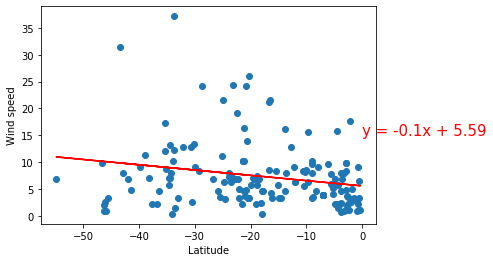

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-squared is: {rvalue}")
plt.show()